*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*
 
# Laboratorio 5
**Curso:** MA4703-1 Control Óptimo: Teoría y Laboratorio  
**Profesor:** Héctor Ramírez C.  
**Auxiliares:** Javier Madariaga R. y Pablo Araya Z.   
**Alumno:** Diego Dominguez - Antonia Labarca

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve, minimize

## Ejercicio 1

In [10]:
def sistema(t, z):
    x, p = z
    if 1+p>0:
        u=0
    else:
        u=1        
    dx=x*u
    dp=1-u-p*u
    return np.array([dx, dp]) 


def control_opt(p):
    N = len(p)
    u = np.zeros(N)
    for i in range(N):
        if 1+p[i] > 0:
            u[i]=0
        else:
            u[i]=1
    return u

def solver(x0, p0, T):
    def funcion_obj(p0, x0, T):
        sol = solve_ivp(sistema, t_span=[0, T], y0=[x0, p0], dense_output=True, rtol = 1e-10)
        xf=sol.y[0][-1]
        pf=sol.y[1][-1]

        return (pf-0)**2

    opt=minimize(funcion_obj, x0=p0, args=(x0,T))
    p0_opt=opt.x[0]
    
    #Resolviendo el sistema con el p_0 óptimo encontrado
    sol_opt = solve_ivp(sistema, t_span=[0, T], y0=[x0, p0_opt], dense_output=True, rtol = 1e-10)
    x_opt=sol_opt.y[0]
    p_opt=sol_opt.y[1]
    pf_opt=p_opt[-1]
    
    u_opt=control_opt(sol_opt.y[1])
    return x_opt, p_opt, u_opt, sol_opt

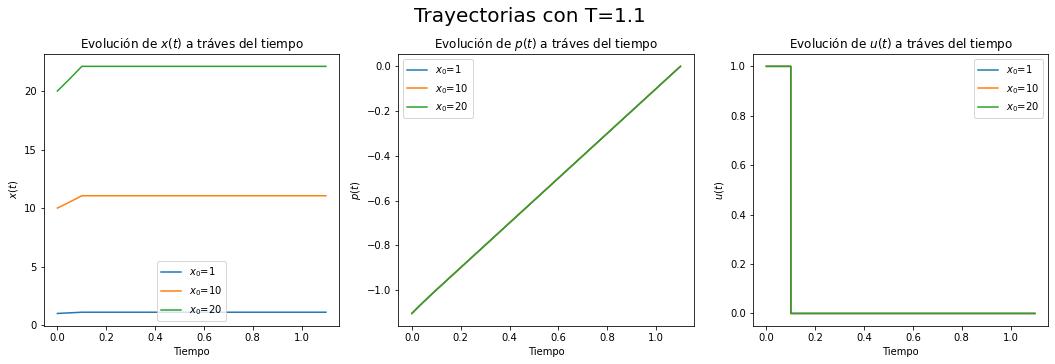

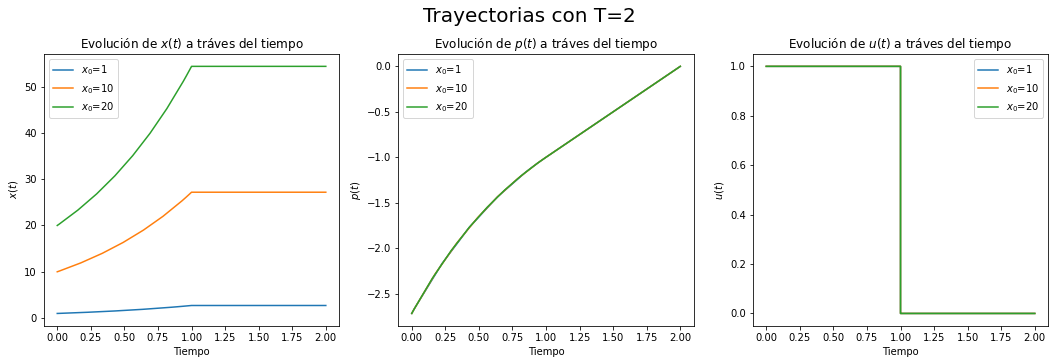

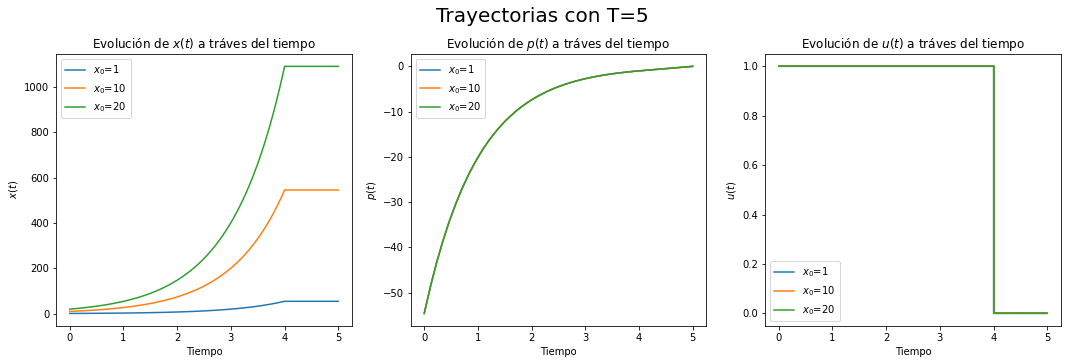

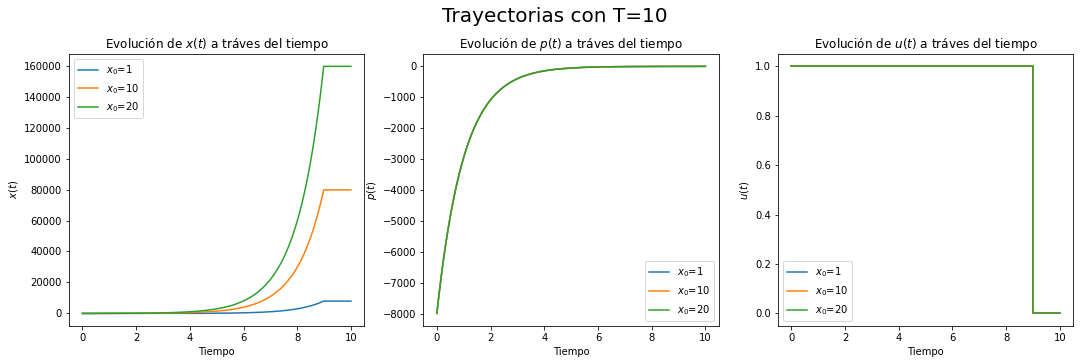

In [12]:
Ts=[1.1,2,5,10]
x0_s=[1,10,20]
for T in Ts:
    tiempos_sol=[]
    soluciones=[]
    for x0 in x0_s:
        p0=0
        x_opt, p_opt, u_opt, sol_opt = solver(x0, p0, T)
        tiempos_sol.append(sol_opt.t)
        soluciones.append([x_opt, p_opt, u_opt])
        
    labels=['x(t)', 'p(t)', 'u(t)']
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(18,5))
    fig.suptitle(f'Trayectorias con T={T}', fontsize=20, y=1.01)
    for i, ax in enumerate(axs):  
        for j in range(len(x0_s)):
            x0=x0_s[j]
            ax.plot(tiempos_sol[j],soluciones[j][i], label=f'$x_0$={x0}')
            
        ax.set_xlabel('Tiempo')
        ax.set_ylabel(f'${labels[i]}$')
        ax.set_title(f'Evolución de ${labels[i]}$ a tráves del tiempo')
        ax.legend(loc='best')

## Ejercicio 2

In [4]:
def V(s,y,T):
    if 0<=s<T-1:
        return y*np.exp(-s+T-1)
    else:
        return y*(T-s)
    
def dx_V(s, y, T):
    if s < T-1:
        return np.exp(-s + T -1)
    else:
        return T - s
    
dt_V = lambda s, y, T, dt: (V(s+dt,y,T)-V(s-dt,y,T))/(2*dt)

In [5]:
def HJB(s, y, T, dt):
    V_t=dt_V(s, y, T, dt)
    V_x=dx_V(s, y, T)
    
    if V_x - 1 > 0:
        w=1
    else:
        w=0
    return V_t + y + y*w*(V_x - 1)

In [6]:
Ts=[1.1,2,5,10]
Deltas=[0.1, 0.01, 0.001, 0.0001]
espacio=np.array([0.1,1,10,100,1000,10000])
for T in Ts:
    df=pd.DataFrame()
    for dt in Deltas:
        tiempo=np.linspace(0+dt,T-dt,100)
        HJB_=np.zeros((len(tiempo),len(espacio)))
        df['Valor espacial']=espacio
        for y in range(len(espacio)):
            for t in range(len(tiempo)):
                HJB_[t,y]=HJB(tiempo[t],espacio[y],T,dt)
        df[f'Error absoluto con $\Delta$={dt}']=np.abs(HJB_).max(axis=0)
    print(f'Resultados con T={T}')
    display(df)
    print(' ')
    print(' ')

Resultados con T=1.1


,Valor espacial,Error absoluto con $\Delta$=0.1,Error absoluto con $\Delta$=0.01,Error absoluto con $\Delta$=0.001,Error absoluto con $\Delta$=0.0001
0,0.1,0.002585,0.000134,8.264964e-07,8.264510e-08
1,1.0,0.025855,0.001336,8.264964e-06,8.264510e-07
2,10.0,0.258546,0.013358,8.264964e-05,8.264512e-06
3,100.0,2.585459,0.133583,8.264964e-04,8.264505e-05
4,1000.0,25.854590,1.335827,8.264964e-03,8.264507e-04
5,10000.0,258.545904,13.358265,8.264964e-02,8.264506e-03


 
 
Resultados con T=2


,Valor espacial,Error absoluto con $\Delta$=0.1,Error absoluto con $\Delta$=0.01,Error absoluto con $\Delta$=0.001,Error absoluto con $\Delta$=0.0001
0,0.1,0.002173,0.000004,4.525942e-08,4.531620e-10
1,1.0,0.021732,0.000045,4.525942e-07,4.529400e-09
2,10.0,0.217318,0.000449,4.525942e-06,4.529399e-08
3,100.0,2.173176,0.004485,4.525941e-05,4.528334e-07
4,1000.0,21.731764,0.044854,4.525942e-04,4.530607e-06
5,10000.0,217.317644,0.448541,4.525942e-03,4.530607e-05


 
 
Resultados con T=5


,Valor espacial,Error absoluto con $\Delta$=0.1,Error absoluto con $\Delta$=0.01,Error absoluto con $\Delta$=0.001,Error absoluto con $\Delta$=0.0001
0,0.1,0.008238,0.000090,9.090587e-07,9.108880e-09
1,1.0,0.082379,0.000901,9.090588e-06,9.108880e-08
2,10.0,0.823786,0.009009,9.090587e-05,9.106038e-07
3,100.0,8.237859,0.090092,9.090589e-04,9.111723e-06
4,1000.0,82.378594,0.900919,9.090589e-03,9.108994e-05
5,10000.0,823.785937,9.009193,9.090587e-02,9.108994e-04


 
 
Resultados con T=10


,Valor espacial,Error absoluto con $\Delta$=0.1,Error absoluto con $\Delta$=0.01,Error absoluto con $\Delta$=0.001,Error absoluto con $\Delta$=0.0001
0,0.1,1.222607,0.013371,0.000135,0.000001
1,1.0,12.226067,0.133708,0.001349,0.000013
2,10.0,122.260673,1.337083,0.013492,0.000135
3,100.0,1222.606733,13.370828,0.134917,0.001349
4,1000.0,12226.067331,133.708283,1.349167,0.013490
5,10000.0,122260.673315,1337.082833,13.491670,0.134875


## Ejercicio 3

In [7]:
def sistema2(t, z, T):
    x=z[0]
    p=dx_V(t, x, T)
    
    if (1-p)*x>0:
        u=0
    else: 
        u=1
        
    dx=x*u
    l=(u-1)*x
    return np.array([dx, l]) 


def solver2(x0, T):
    sol_opt=solve_ivp(fun=sistema2, t_span=[0, T], y0=[x0,0], args=[T], dense_output=True, rtol = 1e-10)
    x_opt=sol_opt.y[0]
    consumo_total=sol_opt.y[1]

    N = len(sol_opt.t)
    u_opt = np.zeros(N)
    for i in range(N):
        if (1-dx_V(sol_opt.t[i],x_opt[i],T))*x_opt[i] > 0:
            u_opt[i]=0
        else:
            u_opt[i]=1
    
    return x_opt, consumo_total, u_opt, sol_opt

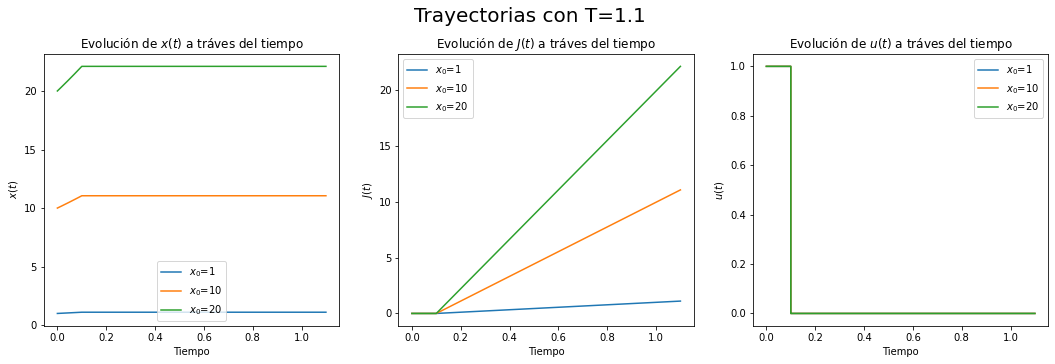

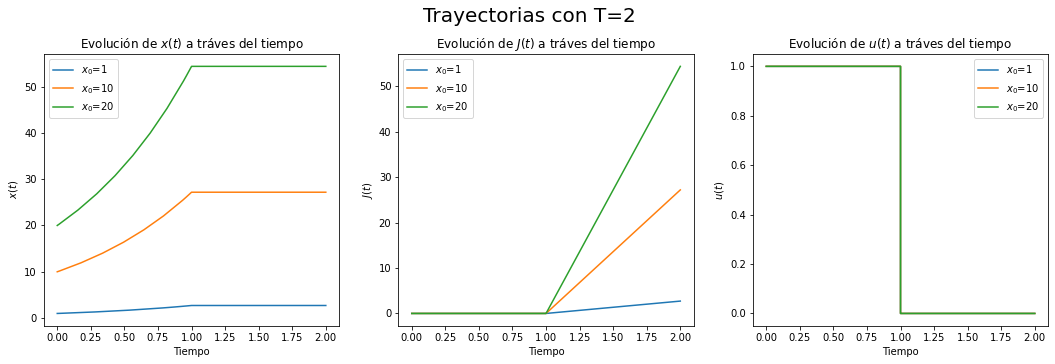

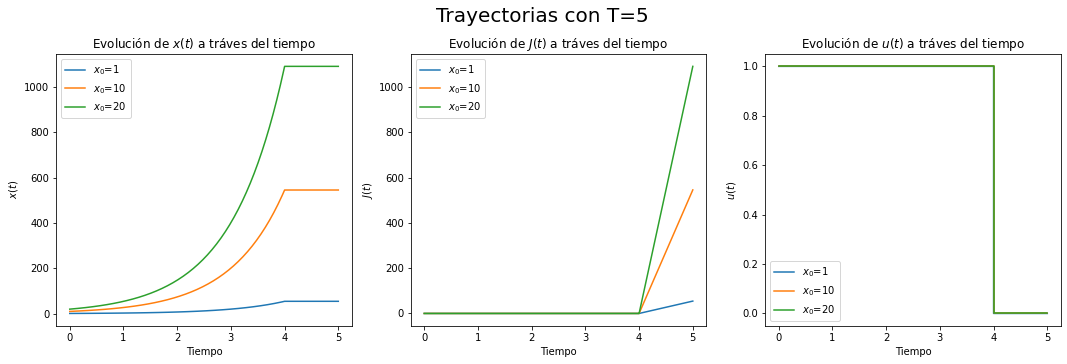

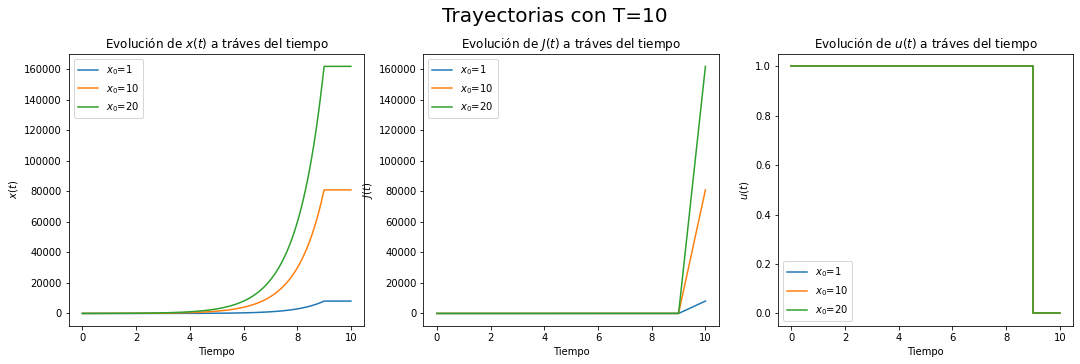

In [8]:
Ts=[1.1,2,5,10]
x0_s=[1,10,20]
Valores_objetivo={}
for T in Ts:
    tiempos_sol=[]
    soluciones=[]
    V_objetivo=[]
    for x0 in x0_s:
        x_opt, consumo_total, u_opt, sol_opt = solver2(x0, T)
        tiempos_sol.append(sol_opt.t)
        soluciones.append([x_opt, -consumo_total, u_opt])

        valor_objetivo=-consumo_total[-1]
        V_objetivo.append(valor_objetivo)
    Valores_objetivo['T='+str(T)]=V_objetivo
        
    labels=['x(t)', 'J(t)', 'u(t)']
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(18,5))
    fig.suptitle(f'Trayectorias con T={T}', fontsize=20, y=1.01)
    for i, ax in enumerate(axs):  
        for j in range(len(x0_s)):
            x0=x0_s[j]
            ax.plot(tiempos_sol[j],soluciones[j][i], label=f'$x_0$={x0}')#label=f'$Y_1$={Y1}, $Y_2$={Y2}, c={c}')
            
        ax.set_xlabel('Tiempo')
        ax.set_ylabel(f'${labels[i]}$')
        ax.set_title(f'Evolución de ${labels[i]}$ a tráves del tiempo')
        ax.legend(loc='best')

In [9]:
#Consumo total para diferentes x0_s
df=pd.DataFrame(Valores_objetivo)
df.insert(0, 'x0', x0_s)
df

,x0,T=1.1,T=2,T=5,T=10
0,1,1.105171,2.718282,54.598164,8103.086117
1,10,11.051709,27.182819,545.981515,81030.841570
2,20,22.103418,54.365637,1091.963016,162061.680880
